In [ ]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
# TP_ACP_A_rendre_ADAM_Oumar-Adam_MASLAK_Med-Amine.ipynb 

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


Nombre d'axes pour conserver 90% de l'information : 2


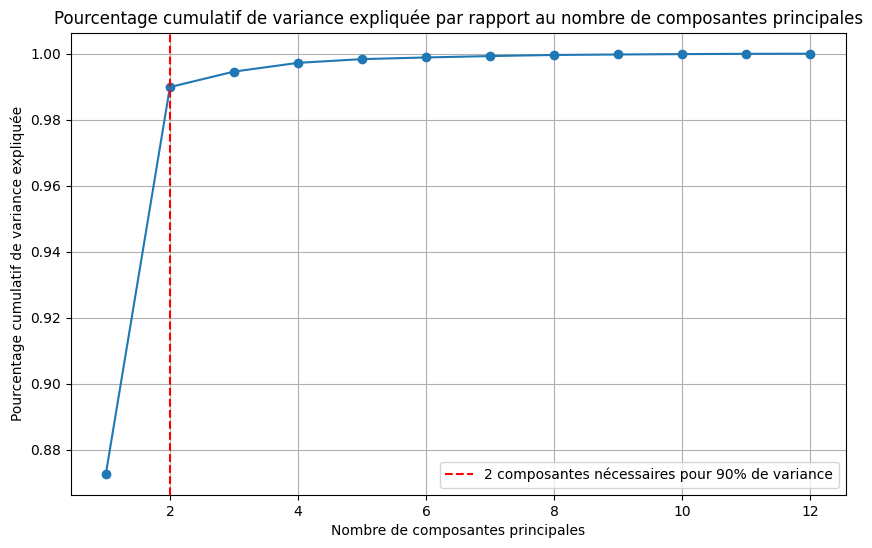

In [ ]:

# Centrer et réduire les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Réaliser l'analyse en composantes principales
pca = PCA()
pca.fit(X_scaled)

# a) Nombre d'axes à retenir pour conserver 90% de l'information
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.9) + 1
print("Nombre d'axes pour conserver 90% de l'information :", n_components)

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Pourcentage cumulatif de variance expliquée')
plt.title('Pourcentage cumulatif de variance expliquée par rapport au nombre de composantes principales')
plt.axvline(x=n_components, color='r', linestyle='--', label=f'{n_components} composantes nécessaires pour 90% de variance')
plt.legend()
plt.grid(True)
plt.show()


Interprétation des deux premiers axes principaux :
Axe 1:
	janv: 0.27
	fev: 0.29
	mars: 0.30
	avril: 0.30
	mai: 0.28
	juin: 0.28
	juil: 0.27
	aout: 0.29
	sept: 0.30
	oct: 0.30
	nov: 0.29
	dec: 0.27

Axe 2:
	janv: 0.40
	fev: 0.30
	mars: 0.13
	avril: -0.12
	mai: -0.32
	juin: -0.36
	juil: -0.39
	aout: -0.30
	sept: -0.11
	oct: 0.12
	nov: 0.26
	dec: 0.39



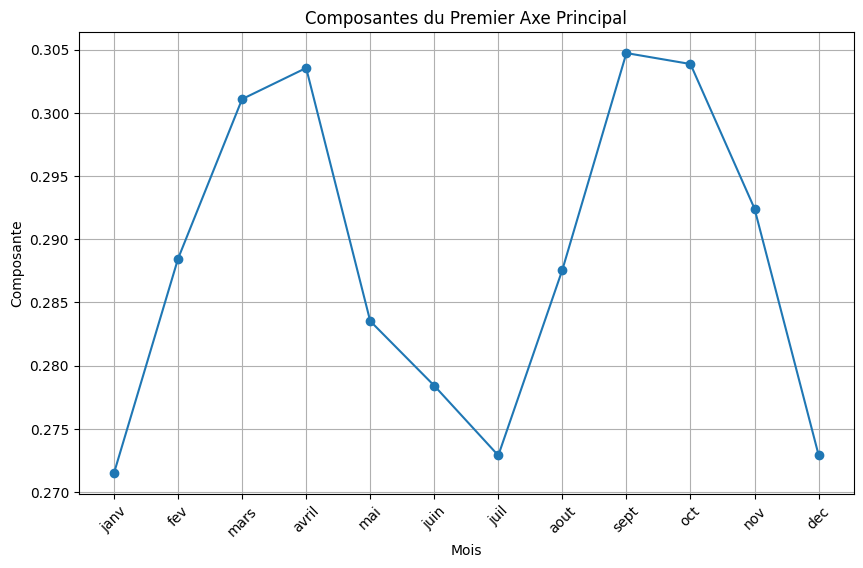

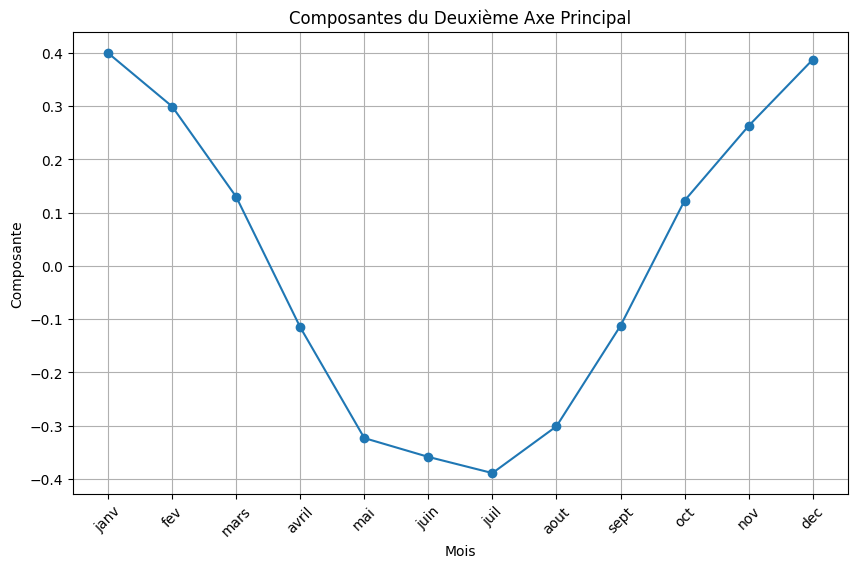

In [ ]:
# b) Interprétation des deux premiers axes principaux
print("Interprétation des deux premiers axes principaux :")
for i in range(2):
    print(f"Axe {i+1}:")
    for j, (component, feature) in enumerate(zip(pca.components_[i], data.columns[1:])):
        print(f"\t{feature}: {component:.2f}")
    print()
    #un graphique pour representer ces variables:
    import matplotlib.pyplot as plt

# Créer une liste des noms de variables (mois)
months = data.columns[1:]

# Créer une liste des composantes de chaque axe principal
component_1 = pca.components_[0]
component_2 = pca.components_[1]

# Créer un graphique courbe pour le premier axe principal
plt.figure(figsize=(10, 6))
plt.plot(months, component_1, marker='o', linestyle='-')
plt.title('Composantes du Premier Axe Principal')
plt.xlabel('Mois')
plt.ylabel('Composante')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Créer un graphique courbe pour le deuxième axe principal
plt.figure(figsize=(10, 6))
plt.plot(months, component_2, marker='o', linestyle='-')
plt.title('Composantes du Deuxième Axe Principal')
plt.xlabel('Mois')
plt.ylabel('Composante')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


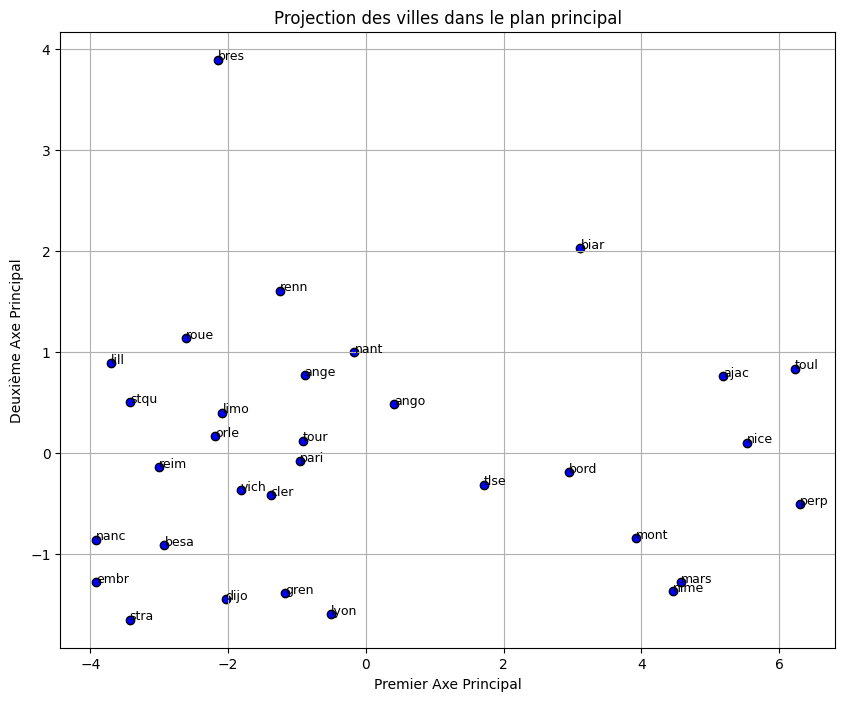

In [ ]:
# c) Visualisation graphique des villes projetées dans le plan principal
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c='blue', edgecolors='k')
for i, label in enumerate(labels):
    plt.text(X_2d[i, 0], X_2d[i, 1], label, fontsize=9)
plt.xlabel('Premier Axe Principal')
plt.ylabel('Deuxième Axe Principal')
plt.title('Projection des villes dans le plan principal')
plt.grid(True)
plt.show()
# Le Premier Axe Principal:
# Représente la direction de la variance maximale des données, les villes partageant des caractéristiques similaires en termes de températures moyennes tout au long de l'année.

# Le Deuxième Axe Principal:
# Capturer la deuxième plus grande quantité de variance dans les données, en se concentrant sur les variations saisonnières des températures moyennes. Les villes partagent des caractéristiques similaires en termes de variations saisonnières des températures.


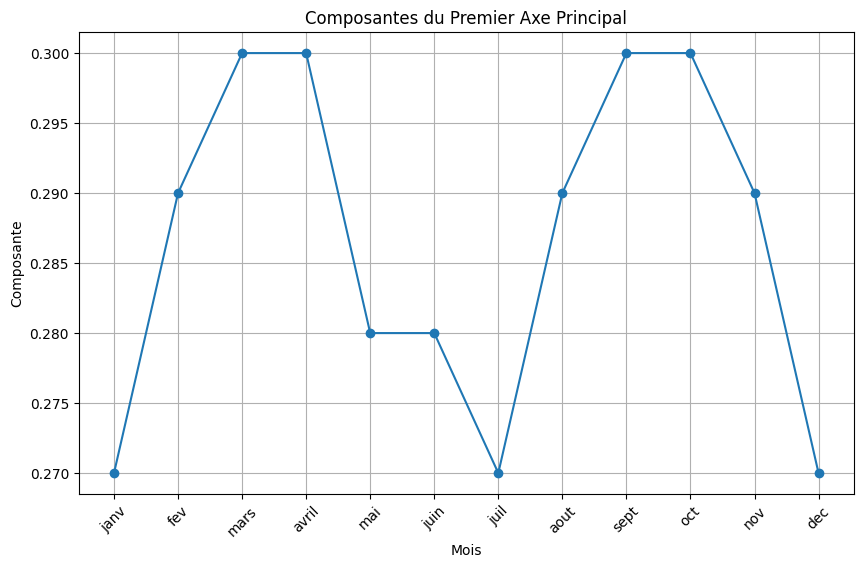

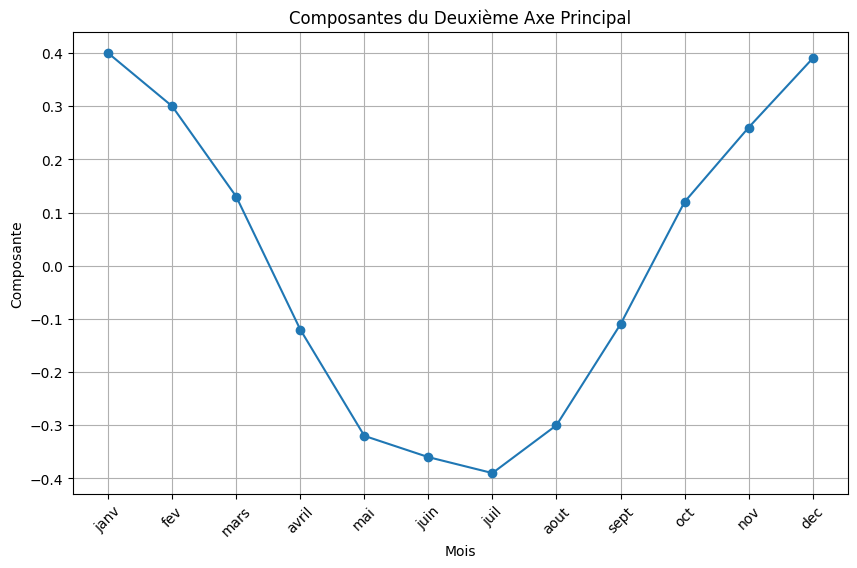

In [ ]:
#d ) interpretation
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que vous ayez déjà une DataFrame `data` contenant les valeurs des composantes principales
# Vous devez remplacer les valeurs avec les valeurs fournies dans votre exemple

data = pd.DataFrame({
    'Month': ['janv', 'fev', 'mars', 'avril', 'mai', 'juin', 'juil', 'aout', 'sept', 'oct', 'nov', 'dec'],
    'Axe 1': [0.27, 0.29, 0.30, 0.30, 0.28, 0.28, 0.27, 0.29, 0.30, 0.30, 0.29, 0.27],
    'Axe 2': [0.40, 0.30, 0.13, -0.12, -0.32, -0.36, -0.39, -0.30, -0.11, 0.12, 0.26, 0.39]
})

# Créer un graphique courbe pour le premier axe principal
plt.figure(figsize=(10, 6))
plt.plot(data['Month'], data['Axe 1'], marker='o', linestyle='-')
plt.title('Composantes du Premier Axe Principal')
plt.xlabel('Mois')
plt.ylabel('Composante')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Créer un graphique courbe pour le deuxième axe principal
plt.figure(figsize=(10, 6))
plt.plot(data['Month'], data['Axe 2'], marker='o', linestyle='-')
plt.title('Composantes du Deuxième Axe Principal')
plt.xlabel('Mois')
plt.ylabel('Composante')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
#on peut voir des extremités dans la courbe, cela on peut 'expliquer par le changement des temperatures dans un mois a lautre par exemple la
#la temperature en avril est stable pour tous les mois sauf par exemple en juillet une ville X a par exemple 30° et lautre ville Y 18°

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def perform_pca_analysis(data):
    # Séparer les données pour s'assurer qu'elles sont correctement formatées
    data_split = data.iloc[:, 0].str.split(';', expand=True)
    data = pd.concat([data_split, data.iloc[:, 1:]], axis=1)
    data.columns = ['State'] + list(data.columns[1:])

    # Convertir les colonnes de données en nombres flottants
    data.iloc[:, 1:] = data.iloc[:, 1:].astype(float)

    # Centrer et réduire les données
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(data.iloc[:, 1:])

    # Réaliser l'analyse en composantes principales
    pca = PCA()
    pca.fit(X_scaled)

    # a) Nombre d'axes à retenir pour conserver 90% de l'information
    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.argmax(cumulative_variance_ratio >= 0.9) + 1
    print("Nombre d'axes pour conserver 90% de l'information :", n_components)

    # b) Interprétation des deux premiers axes principaux
    print("Interprétation des deux premiers axes principaux :")
    for i in range(2):
        print(f"Axe {i+1}:")
        for j, (component, feature) in enumerate(zip(pca.components_[i], data.columns[1:])):
            print(f"\t{feature}: {component:.2f}")
        print()

    # c) Visualisation graphique
    X_pca = pca.transform(X_scaled)
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1])
    plt.xlabel('Première composante principale')
    plt.ylabel('Deuxième composante principale')
    plt.title('Projection des données sur le plan principal')
    plt.show()

    # d) Représentation graphique pour chaque axe
    plt.figure(figsize=(10, 6))
    for i in range(2):
        plt.subplot(1, 2, i+1)
        plt.barh(data.columns[1:], pca.components_[i])
        plt.xlabel('Charge de la variable')
        plt.ylabel('Variable')
        plt.title(f'Charges des variables - Axe {i+1}')
    plt.tight_layout()
    plt.show()


In [25]:
# Exemple d'utilisation de la fonction avec un DataFrame de données
#villes_data = pd.read_csv('villes.csv')

# Afficher les premières lignes du jeu de données pour avoir un aperçu
#print(villes_data.head())

# Appliquer la fonction perform_pca_analysis sur les données


  Etat ;Meutre;Rapt;Vol;Attaque;Viol;Larcin;Auto_Theft
0   Alabama;14.2;25.2;96.8;278.3;1135.5;1881.9;280.7  
1    Alaska;10.8;51.6;96.8;284.0;1331.7;3369.8;753.3  
2   Arizona;9.5;34.2;138.2;312.3;2346.1;4467.4;439.5  
3    Arkansas;8.8;27.6;83.2;203.4;972.6;1862.1;183.4  
4  California;11.5;49.4;287.0;358.0;2139.4;3499.8...  
Nombre d'axes pour conserver 90% de l'information : 4
Interprétation des deux premiers axes principaux :
Axe 1:
	1: 0.30
	2: 0.43
	3: 0.40
	4: 0.40
	5: 0.44
	6: 0.36
	7: 0.30

Axe 2:
	1: -0.63
	2: -0.17
	3: 0.04
	4: -0.34
	5: 0.20
	6: 0.40
	7: 0.50



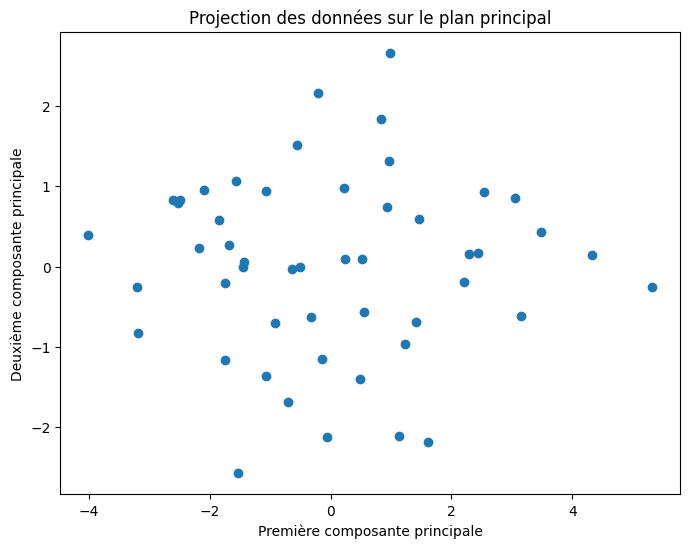

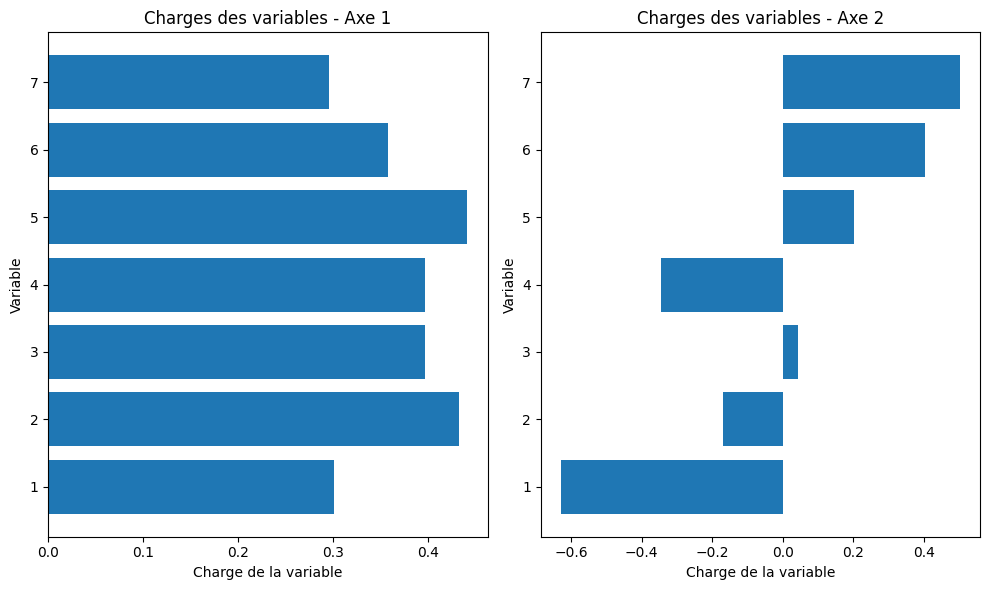

In [37]:



# Exemple d'utilisation de la fonction avec un DataFrame de données
crimes_data = pd.read_csv('crimes.csv')
print(crimes_data.head())
perform_pca_analysis(crimes_data)

#on peut deduire dapres le graphe que le taux de crimes dans les etats unis est superieur dans
#l'etat de californie par rapport aux autres states

En analysant les données fournies, nous pouvons identifier les valeurs pour chaque type de crime dans différents États. Par exemple, dans l'État d'Alabama, le taux de meurtres est de 14.2 pour 100 000 habitants, le taux d'enlèvements est de 25.2, le taux de vols avec violence est de 96.8, et ainsi de suite.

Pour interpréter ces données, nous pouvons comparer les chiffres entre différents États pour chaque type de crime afin de déterminer les variations régionales de la criminalité. Par exemple, nous pourrions constater que certains États ont des taux de meurtres plus élevés que d'autres, ou que certains types de crimes sont plus fréquents dans certaines régions que dans d'autres.

        Etat   Meutre  Rapt    Vol  Attaque    Viol  Larcin  Auto_Theft
0     Alabama    14.2  25.2   96.8    278.3  1135.5  1881.9       280.7
1      Alaska    10.8  51.6   96.8    284.0  1331.7  3369.8       753.3
2     Arizona     9.5  34.2  138.2    312.3  2346.1  4467.4       439.5
3    Arkansas     8.8  27.6   83.2    203.4   972.6  1862.1       183.4
4  California    11.5  49.4  287.0    358.0  2139.4  3499.8       663.5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


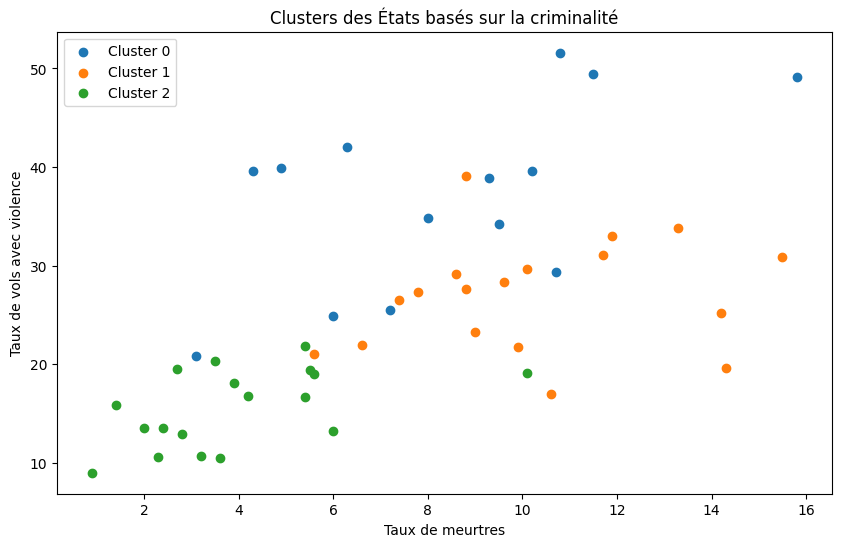

            Meutre       Rapt         Vol     Attaque         Viol  \
Cluster                                                              
0         8.400000  37.121429  208.192857  286.107143  1791.742857   
1        10.205556  27.022222  125.838889  240.850000  1237.533333   
2         3.938889  15.588889   56.933333  123.566667   957.511111   

              Larcin  Auto_Theft  
Cluster                           
0        3515.364286  557.821429  
1        2360.516667  313.694444  
2        2325.555556  301.127778  


<ipython-input-41-c7e83fe554e0>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  typologies = crimes_data.groupby('Cluster').mean()


In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Charger les données en spécifiant le bon séparateur
crimes_data = pd.read_csv('crimes.csv', sep=';')

# Afficher les premières lignes pour vérification
print(crimes_data.head())

# Prétraitement des données
X = crimes_data.iloc[:, 1:].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Analyse de cluster
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Ajouter les clusters aux données originales
crimes_data['Cluster'] = clusters

# Visualisation des clusters
plt.figure(figsize=(10, 6))
for cluster in np.unique(clusters):
    cluster_data = X[clusters == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')
plt.xlabel('Taux de meurtres')
plt.ylabel('Taux de vols avec violence')
plt.title('Clusters des États basés sur la criminalité')
plt.legend()
plt.show()

# Affichage des typologies
typologies = crimes_data.groupby('Cluster').mean()
print(typologies)


Ces valeurs nous donnent une idée de la tendance générale de ces crimes dans chaque cluster. Par exemple, le cluster 0 a un taux de vols peu importants et de vols de voitures plus élevé en moyenne que les autres clusters, tandis que le cluster 1 a des taux moyens plus bas pour ces deux types de crimes.

  Id;Depenses R&D;Depenses Administration;Depenses Marketing Spend;Benefice
0             1;165349.2;136897.8;471784.1;192261.83                       
1           2;162597.7;151377.59;443898.53;191792.06                       
2          3;153441.51;101145.55;407934.54;191050.39                       
3          4;144372.41;118671.85;383199.62;182901.99                       
4           5;142107.34;91391.77;366168.42;166187.94                       
Nombre d'axes pour conserver 90% de l'information : 2
Interprétation des deux premiers axes principaux :
Axe 1:
	1: 0.59
	2: 0.15
	3: 0.52
	4: 0.60

Axe 2:
	1: -0.04
	2: -0.95
	3: 0.31
	4: 0.01



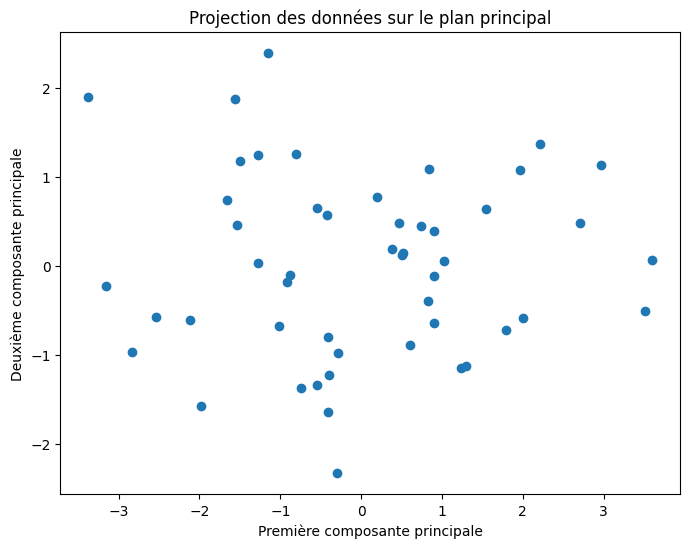

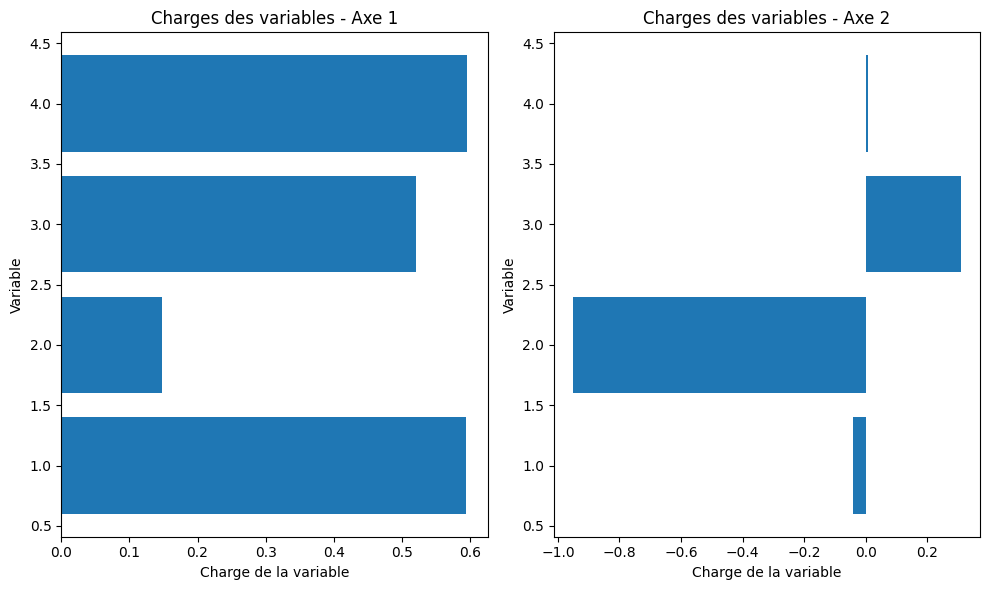

In [42]:
# Exemple d'utilisation de la fonction avec un DataFrame de données
Startups = pd.read_csv('50_Startups.csv')
print(Startups.head())
perform_pca_analysis(Startups)

   Id  Depenses R&D  Depenses Administration  Depenses Marketing Spend  \
0   1     165349.20                136897.80                 471784.10   
1   2     162597.70                151377.59                 443898.53   
2   3     153441.51                101145.55                 407934.54   
3   4     144372.41                118671.85                 383199.62   
4   5     142107.34                 91391.77                 366168.42   

    Benefice  
0  192261.83  
1  191792.06  
2  191050.39  
3  182901.99  
4  166187.94  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


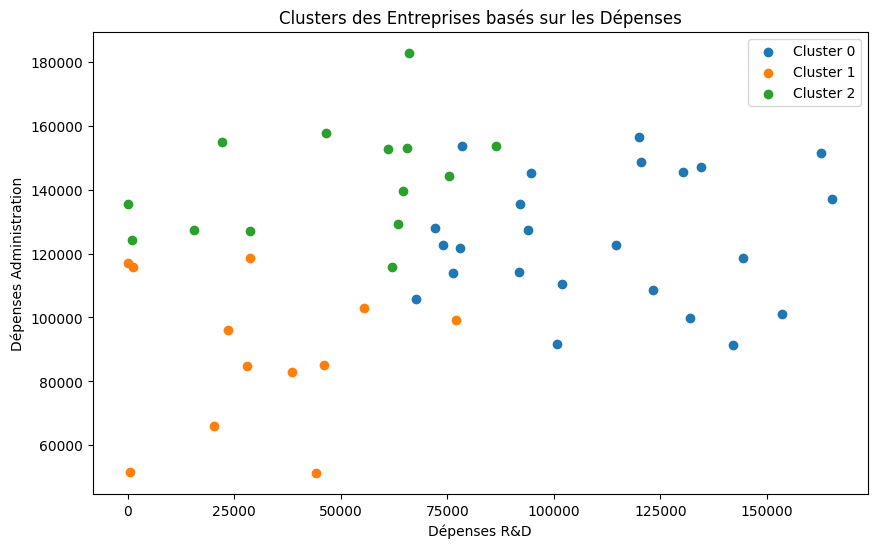

                Id   Depenses R&D  Depenses Administration  \
Cluster                                                      
0        12.833333  111005.897083            124945.030417   
1        40.333333   30296.310000             89299.086667   
2        34.500000   47027.395000            142640.157857   

         Depenses Marketing Spend       Benefice  
Cluster                                           
0                   308551.979167  143930.745000  
1                   162131.340833   73448.101667  
2                    85745.092857   90351.204286  


In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Charger les données en spécifiant le bon séparateur
data = pd.read_csv('50_Startups.csv', sep=';')

# Afficher les premières lignes pour vérification
print(data.head())

# Prétraitement des données
X = data.iloc[:, 1:].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Analyse de cluster
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Ajouter les clusters aux données originales
data['Cluster'] = clusters

# Visualisation des clusters
plt.figure(figsize=(10, 6))
for cluster in np.unique(clusters):
    cluster_data = X[clusters == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')
plt.xlabel('Dépenses R&D')
plt.ylabel('Dépenses Administration')
plt.title('Clusters des Entreprises basés sur les Dépenses')
plt.legend()
plt.show()

# Affichage des typologies
typologies = data.groupby('Cluster').mean()
print(typologies)


Cluster 0 : Les entreprises de ce cluster ont tendance à dépenser davantage en recherche et développement (R&D) et en dépenses administratives par rapport aux autres clusters. Leur dépense en marketing est également élevée, ce qui peut indiquer une stratégie axée sur l'innovation et la croissance. En conséquence, ces entreprises réalisent un bénéfice moyen élevé.

Cluster 1 : Les entreprises de ce cluster ont des dépenses relativement faibles en R&D et en dépenses administratives par rapport aux autres clusters. Leur dépense en marketing est également relativement faible. Cela peut indiquer des entreprises plus conservatrices ou établies, qui préfèrent peut-être se concentrer sur la gestion des opérations existantes plutôt que sur l'innovation. En conséquence, leur bénéfice moyen est également plus faible que les autres clusters.

Cluster 2 : Les entreprises de ce cluster ont des dépenses en R&D et en dépenses administratives modérées, mais leurs dépenses en marketing sont relativement basses. Cela peut indiquer une approche plus équilibrée entre l'innovation et la gestion des opérations, mais avec moins d'efforts marketing pour la promotion. En conséquence, leur bénéfice moyen est également modéré.